<a href="https://colab.research.google.com/github/KarlaBalog/Estadistica_Descriptiva/blob/main/Tarea_Estadistica_Descriptiva_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import files #Sirve para cargar archivos desde el disco duro a google colab
uploaded = files.upload()

Saving data.csv to data.csv


In [3]:
datos = pd.read_csv("data.csv", encoding='cp1252')#Lee el archivo que anteriormente ya fue cargado

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
datos.head(5)

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01


In [5]:
datos.shape

(435742, 13)

In [6]:
datos.isnull().sum()

stn_code                       144077
sampling_date                       3
state                               0
location                            3
agency                         149481
type                             5393
so2                             34646
no2                             16233
rspm                            40222
spm                            237387
location_monitoring_station     27491
pm2_5                          426428
date                                7
dtype: int64

In [7]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   stn_code                     291665 non-null  object 
 1   sampling_date                435739 non-null  object 
 2   state                        435742 non-null  object 
 3   location                     435739 non-null  object 
 4   agency                       286261 non-null  object 
 5   type                         430349 non-null  object 
 6   so2                          401096 non-null  float64
 7   no2                          419509 non-null  float64
 8   rspm                         395520 non-null  float64
 9   spm                          198355 non-null  float64
 10  location_monitoring_station  408251 non-null  object 
 11  pm2_5                        9314 non-null    float64
 12  date                         435735 non-null  object 
dtyp

In [8]:
datos.count()

stn_code                       291665
sampling_date                  435739
state                          435742
location                       435739
agency                         286261
type                           430349
so2                            401096
no2                            419509
rspm                           395520
spm                            198355
location_monitoring_station    408251
pm2_5                            9314
date                           435735
dtype: int64

In [9]:
datos.describe()

,so2,no2,rspm,spm,pm2_5
count,401096.000000,419509.000000,395520.000000,198355.000000,9314.000000
mean,10.829414,25.809623,108.832784,220.783480,40.791467
std,11.177187,18.503086,74.872430,151.395457,30.832525
min,0.000000,0.000000,0.000000,0.000000,3.000000
25%,5.000000,14.000000,56.000000,111.000000,24.000000
50%,8.000000,22.000000,90.000000,187.000000,32.000000
75%,13.700000,32.200000,142.000000,296.000000,46.000000
max,909.000000,876.000000,6307.033333,3380.000000,504.000000


In [10]:
datos=datos.drop(['stn_code'], axis=1) #Se eliminan las columnas que no me sirven para nada
datos=datos.drop(['agency'], axis=1)
datos=datos.drop(['sampling_date'], axis=1)
datos=datos.drop(['location_monitoring_station'], axis=1)

In [11]:
datos.loc[datos.type=="Industrial Area",'type']='Industrial Areas'

In [12]:
dato = pd.DataFrame({'Joined date': pd.to_datetime(datos["date"])})

In [13]:
datos['Year'] = dato['Joined date'].dt.year 

In [14]:
media_SO2=datos['so2'].median()
media_NO2=datos['no2'].median()
media_rspm=datos['rspm'].median()
media_spm=datos['spm'].median()
media_pm2_5=datos['pm2_5'].median()

In [15]:
datos.so2=datos.so2.fillna(media_SO2)
datos.no2=datos.no2.fillna(media_NO2)
datos.rspm=datos.rspm.fillna(media_rspm)
datos.spm=datos.spm.fillna(media_spm)
datos.pm2_5=datos.pm2_5.fillna(media_pm2_5)

In [16]:
datos.isnull().sum()

state          0
location       3
type        5393
so2            0
no2            0
rspm           0
spm            0
pm2_5          0
date           7
Year           7
dtype: int64

In [17]:
datos2=datos.groupby("state").mean()

In [19]:
datos2

,so2,no2,rspm,spm,pm2_5,Year
state,,,,,,
Andhra Pradesh,7.303478,21.710627,78.693730,192.928648,32.000000,2009.937614
Arunachal Pradesh,4.411111,9.877778,76.777778,187.000000,32.000000,2014.666667
Assam,6.732033,14.823095,93.671427,176.755953,32.000000,2010.988792
Bihar,18.641055,36.030945,109.749011,257.352967,32.000000,2002.890549
Chandigarh,5.239155,18.990000,96.294836,198.073592,32.000000,2009.221831
Chhattisgarh,12.535921,24.695139,121.502913,209.295365,32.000000,2009.465330
Dadra & Nagar Haveli,8.932177,18.323186,80.698738,176.047319,31.899054,2009.069401
Daman & Diu,8.192711,16.168926,80.877238,157.147059,31.768542,2005.973146
Delhi,8.673383,51.485861,173.144352,322.598526,34.738276,2006.803415


In [20]:
datos2=datos2.reset_index()

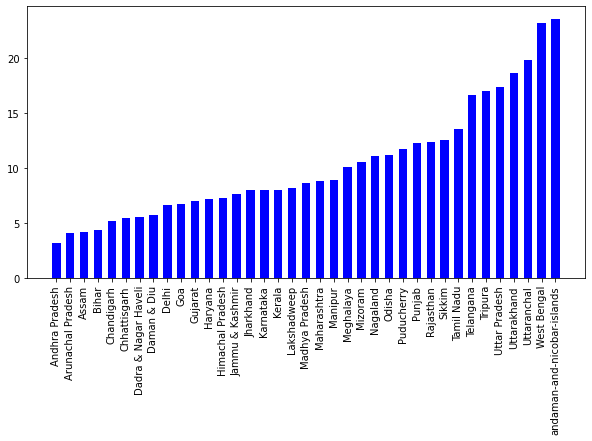

In [21]:
import matplotlib.pyplot as plt
height= list(datos2['so2'])
bars = list(datos2['state'])
height=sorted(height)
plt.figure(figsize=(10,5))
plt.bar(bars, height, color="blue", width=0.6)
plt.xticks(rotation=90)
plt.show() 

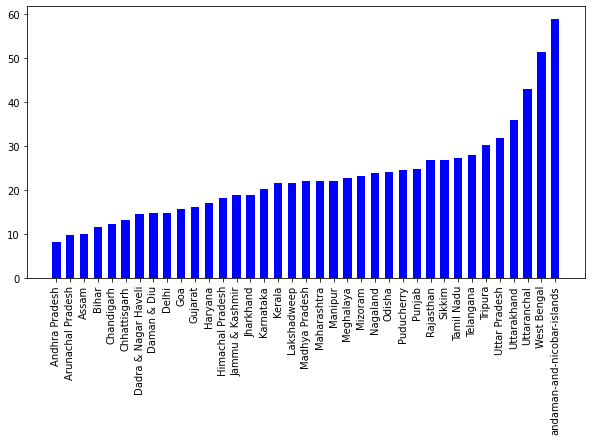

In [22]:
import matplotlib.pyplot as plt
height= list(datos2['no2'])
bars = list(datos2['state'])
height=sorted(height)
plt.figure(figsize=(10,5))
plt.bar(bars, height, color="blue", width=0.6)
plt.xticks(rotation=90)
plt.show() 

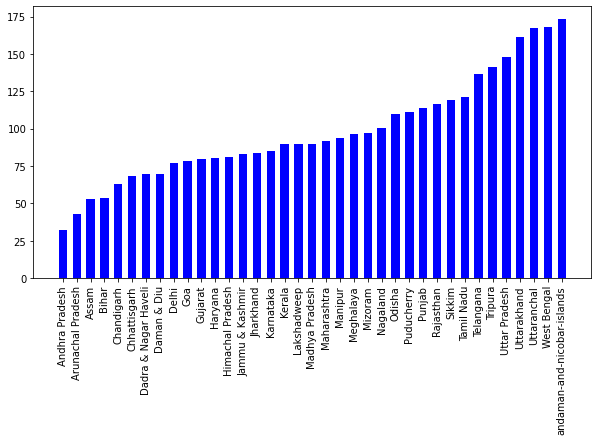

In [24]:
import matplotlib.pyplot as plt
height= list(datos2['rspm'])
bars = list(datos2['state'])
height=sorted(height)
plt.figure(figsize=(10,5))
plt.bar(bars, height, color="blue", width=0.6)
plt.xticks(rotation=90)
plt.show() 

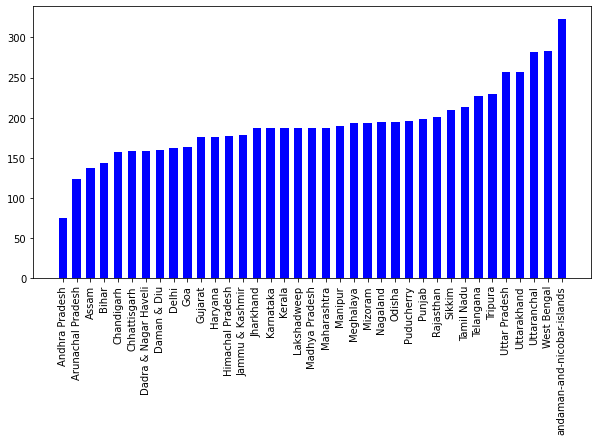

In [25]:
import matplotlib.pyplot as plt
height= list(datos2['spm'])
bars = list(datos2['state'])
height=sorted(height)
plt.figure(figsize=(10,5))
plt.bar(bars, height, color="blue", width=0.6)
plt.xticks(rotation=90)
plt.show() 